# Exercise: 311 Requests

#### Summary

In NYC, you can call 311 with *anything* about the city - questions, complaints, etc. We'll be analyzing requests from 2015-2016 from the Department of Transportation and NYPD.

#### Data Source(s)

Filtered from full set, https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

#### Files

- `311-requests/311_Service_Requests_from_2010_to_Present.csv`, about 1.8 million rows (over 1GB of data)

#### Data dictionary

Visit [this page](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9#schema-preview) and click 'Show more' on the bottom right of the list (53 columns).

#### Skills

- Opening large files
- Time

## Opening the file

It's a big one! If your computer is slow or you only have 2GB of RAM, you might want to specify `nrows=50000` (or less). Increase the number until it takes around 20 seconds, maybe!

In [194]:
%matplotlib inline
import pandas as pd
import datetime as date

In [ ]:
#df = pd.read_csv('data/311_Service_Requests_from_2010_to_Present.csv', nrows=75000)
#df.head()

### Measuring time in Jupyter Notebooks

How long did that take? Read it in again, but this time **time how long it takes.** (and no, not with your watch - with Jupyter!)

In [ ]:
%%time
#df = pd.read_csv('data/311_Service_Requests_from_2010_to_Present.csv')

### Look at the first few rows

Make sure you can see **every single column.**

In [3]:
pd.options.display.max_columns = 60
pd.options.display.max_rows = 60

### Speeding things up

We're going to be looking at open and close times, agencies, and the complaints (both types and descriptor). The only kind of location-based thing we'll want is borough.

**How much faster is it if we only read in those columns?**

In [4]:
#pd.options.display.max_columns= xxx
pd.set_option('display.max_columns', 100)

In [ ]:
df.columns

In [50]:
%%time
#this is the good one
df = pd.read_csv('data/311_Service_Requests_from_2010_to_Present.csv', usecols=['Agency', 'Agency Name', 'Closed Date','Created Date', 'Complaint Type','Descriptor', 'Borough'])

CPU times: user 20.2 s, sys: 1.53 s, total: 21.7 s
Wall time: 27 s


## Converting the 'Created Date' and 'Closed Date' columns to datetimes

### First, testing some things out

Let's take a look at converting **Created Date**, but **not all at once**.

1. Take 10,000 of them and try to convert them **without** a format string. Time it.
2. Take the same 10,000 and try to convert them **with** a format string. Time it.

If you tried to do all 1.8 million rows, **how long might it take with a format string vs without?**

In [ ]:
%%time
#pd.to_datetime(df['Created Date'].head(10000))

In [52]:
first_ten_thousands = df['Created Date'].head(10000)
pd.to_datetime(first_ten_thousands)
df.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Borough
0,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,BRONX
1,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN
2,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN
3,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,BROOKLYN
4,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,BROOKLYN


In [53]:
df['created_at'] = df['Created Date']
pd.to_datetime(df['created_at'], format = "%m/%d/%Y %H:%M:%S %p")

0         2015-09-04 10:55:25
1         2015-09-04 01:53:45
2         2015-09-04 09:15:43
3         2015-09-05 01:06:57
4         2015-09-04 07:48:25
5         2015-09-04 11:31:12
6         2015-09-04 07:02:24
7         2015-09-04 12:34:05
8         2015-09-04 07:56:42
9         2015-09-04 09:04:42
10        2015-09-04 08:26:09
11        2015-09-04 11:07:15
12        2015-09-04 10:23:59
13        2015-09-04 11:16:12
14        2015-09-04 04:49:55
15        2015-09-04 02:39:46
16        2015-09-04 08:21:22
17        2015-09-04 11:34:23
18        2015-09-04 09:55:19
19        2015-09-04 11:44:07
20        2015-09-04 08:12:10
21        2015-09-04 11:14:40
22        2015-09-04 08:17:20
23        2015-09-04 10:54:59
24        2015-09-04 03:45:14
25        2015-09-04 11:48:20
26        2015-09-05 01:53:40
27        2015-09-04 11:34:47
28        2015-09-04 11:37:52
29        2015-09-04 11:01:37
                  ...        
1844248   2016-08-13 12:43:04
1844249   2016-08-26 02:04:00
1844250   

### Creating new columns

Create new columns called `created_at` and `closed_at` from the `Created Date` and `Closed Date` columns. Do them individually, and **time them**.

In [139]:
df['created_at'] = pd.to_datetime(df['Created Date'], format = "%m/%d/%Y %I:%M:%S %p")

In [140]:
df['closed_at'] = pd.to_datetime(df['Closed Date'], format = "%m/%d/%Y %I:%M:%S %p")

### Confirming they look okay

Take a look at the first few rows to make sure the dates look correct, and then make sure their data type is `datetime64[ns]`.

In [141]:
df.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Borough,closed_at,created_at
created_at,,,,,,,,,
2015-09-04 10:55:25,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,BRONX,2015-09-05 02:06:54,2015-09-04 22:55:25
2015-09-04 01:53:45,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 18:37:24,2015-09-04 13:53:45
2015-09-04 09:15:43,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 22:32:01,2015-09-04 21:15:43
2015-09-05 01:06:57,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,BROOKLYN,2015-09-05 02:26:43,2015-09-05 01:06:57
2015-09-04 07:48:25,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,BROOKLYN,2015-09-04 17:21:18,2015-09-04 07:48:25


In [142]:
df.dtypes

Created Date              object
Closed Date               object
Agency                    object
Agency Name               object
Complaint Type            object
Descriptor                object
Borough                   object
closed_at         datetime64[ns]
created_at        datetime64[ns]
dtype: object

# Examining agencies

Who has more 311 requests, the Department of Transportation or the NYPD?

In [143]:
df.groupby('Agency').count() #the NYPD has more requests

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Borough,closed_at,created_at
Agency,,,,,,,,
DOT,593157,586842,593157,593157,593152,593157,586842,593157
NYPD,1251121,1244689,1251121,1251121,1237932,1251121,1244689,1251121


## What's the difference between "Complaint Type" and "Descriptor" columns?

In [144]:
#Complaint Type is broader category and Descriptor is more precise

## What are the most popular categories of complaints for the NYPD? For the DOT?

In [145]:
NYPD = df[df['Agency'] == 'NYPD']

In [146]:
NYPD['Complaint Type'].value_counts().head()

Noise - Residential        429932
Blocked Driveway           219927
Illegal Parking            215158
Noise - Street/Sidewalk    112890
Noise - Commercial          93115
Name: Complaint Type, dtype: int64

In [147]:
DOT = df[df['Agency'] == 'DOT']

In [148]:
DOT['Complaint Type'].value_counts().head()

Street Condition            215052
Street Light Condition      187228
Traffic Signal Condition     79737
Broken Muni Meter            47234
Street Sign - Damaged        12041
Name: Complaint Type, dtype: int64

## When people are complaining about street conditions, what are they usually complaining about?

In [149]:
DOT[DOT['Complaint Type'] == 'Street Condition']['Descriptor'].value_counts().head()

Pothole                           137931
Cave-in                            22026
Rough, Pitted or Cracked Roads     12150
Defective Hardware                 11206
Failed Street Repair                9408
Name: Descriptor, dtype: int64

## What kinds of noise are they complaining about when making residential noise complaints?

In [150]:
NYPD[NYPD['Complaint Type'] == 'Noise - Residential']['Descriptor'].value_counts().head()

Loud Music/Party    283631
Banging/Pounding    108470
Loud Talking         30097
Loud Television       7734
Name: Descriptor, dtype: int64

# Timing our complaints

How many complaints were filed each month?

- Tip: You'll probably want to `.set_index` first!

In [151]:
df.set_index('created_at', inplace=True)

In [152]:
df.resample('M').count()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Borough,closed_at
created_at,,,,,,,,
2015-01-31,58168,57932,58168,58168,58168,57968,58168,57932
2015-02-28,59895,59663,59895,59895,59895,59763,59895,59663
2015-03-31,87190,86753,87190,87190,87190,86902,87190,86753
2015-04-30,78002,77626,78002,78002,78002,77614,78002,77626
2015-05-31,87582,86677,87582,87582,87582,86909,87582,86677
2015-06-30,84486,83924,84486,84486,84486,83812,84486,83924
2015-07-31,77795,76561,77795,77795,77795,76889,77795,76561
2015-08-31,78793,78286,78793,78793,78793,77917,78793,78286
2015-09-30,78317,77764,78317,78317,78317,77475,78317,77764


## Plot how many requests were filed each month

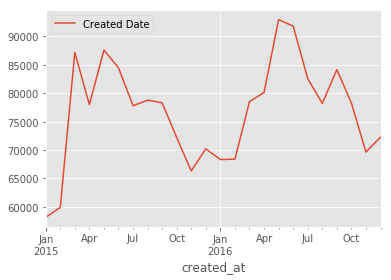

In [153]:
df.resample('M').count().plot(y='Created Date')

# Hmmm, it looks like a cycle

What could cause that? Try a couple comparisons to see if you can find out.

- Tip: Maybe the most popular summer complaints vs winter
- Tip: Maybe graphing the different agencies on the same graph

If you don't figure it out **that's okay!** 

In [154]:
NYPD.set_index('created_at', inplace=True)

In [155]:
DOT.set_index('created_at', inplace=True)

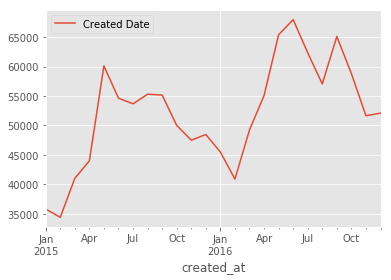

In [156]:
NYPD.resample('M').count().plot(y='Created Date')

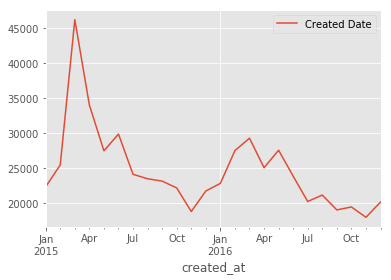

In [157]:
DOT.resample('M').count().plot(y='Created Date')

In [158]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

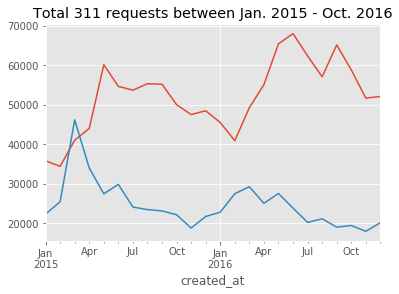

In [159]:
fig, ax = plt.subplots(1,1)
NYPD.resample('M').count().plot(y = 'Created Date', ax=ax, legend = False)
DOT.resample('M').count().plot(y = 'Created Date', ax=ax, legend = False)
ax.set_title('Total 311 requests between Jan. 2015 - Oct. 2016')

In [160]:
noise = df[df['Complaint Type'] == 'Noise - Residential']
blocked = df[df['Complaint Type'] == 'Blocked Driveway']
parking = df[df['Complaint Type'] == 'Illegal Parking']
st_condition = df[df['Complaint Type'] == 'Street Condition']
light_condition = df[df['Complaint Type'] == 'Street Light Condition']

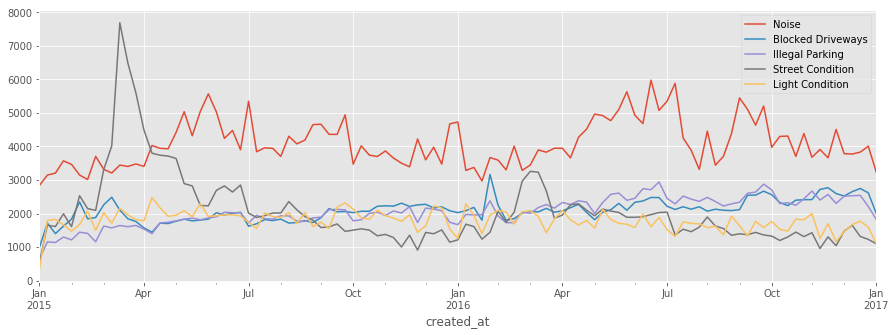

In [161]:
fig, ax = plt.subplots(1,1, figsize = (15,5))
noise.resample('w').count().plot(y = 'Created Date', ax = ax, label = 'Noise')
blocked.resample('w').count().plot(y = 'Created Date', ax = ax, label = 'Blocked Driveways')
parking.resample('w').count().plot(y = 'Created Date', ax = ax, label = 'Illegal Parking')
st_condition.resample('w').count().plot(y = 'Created Date', ax = ax, label = 'Street Condition')
light_condition.resample('w').count().plot(y = 'Created Date', ax = ax, label = 'Light Condition')

In [162]:
#Street Conditions in March were bad because of a Blizzard

In [163]:
st_condition.resample('D').count().sort_values(by='Borough', ascending=False).head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Borough,closed_at
created_at,,,,,,,,
2015-03-11,1387,1371,1387,1387,1387,1387,1387,1371
2015-03-16,1367,1348,1367,1367,1367,1367,1367,1348
2015-03-12,1331,1321,1331,1331,1331,1331,1331,1321
2015-03-17,1281,1263,1281,1281,1281,1281,1281,1263
2015-03-10,1279,1261,1279,1279,1279,1279,1279,1261


## Time of day

### What time of day do people complain?

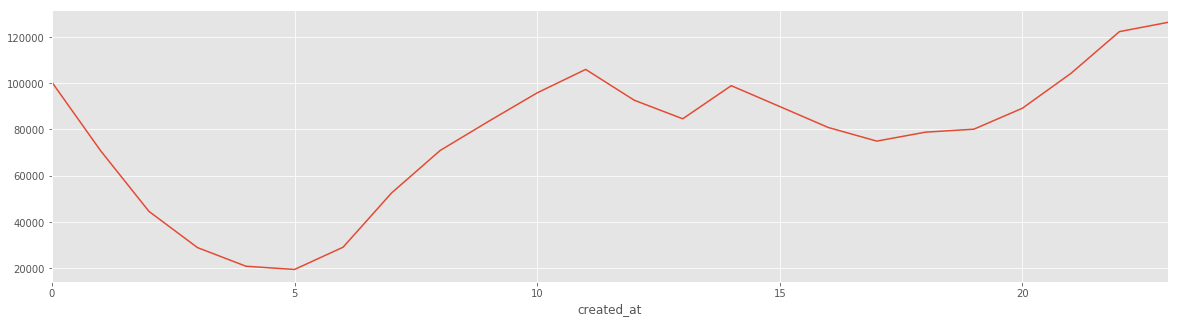

In [174]:
df.groupby(df.index.hour)['Created Date'].count().plot(figsize=(20,5))

### What time of day do people complain about potholes?

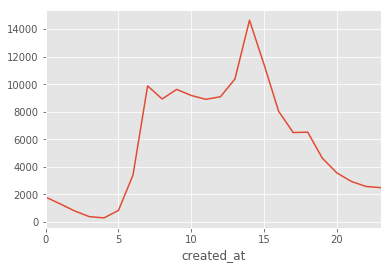

In [185]:
pothole = df[df['Descriptor'] == 'Pothole']
pothole.groupby(pothole.index.hour)['Created Date'].count().plot(y='Created Date')

### What time of day do people complain about loud parties?

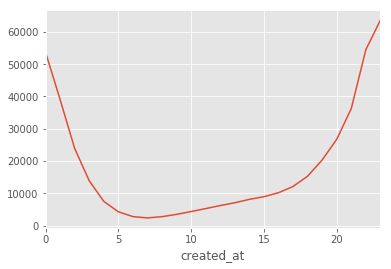

In [186]:
loud_parties = df[df['Descriptor'] == 'Loud Music/Party']
loud_parties.groupby(loud_parties.index.hour)['Created Date'].count().plot(y='Created Date')

## Days of the week

### What days of the week do people complain about potholes?

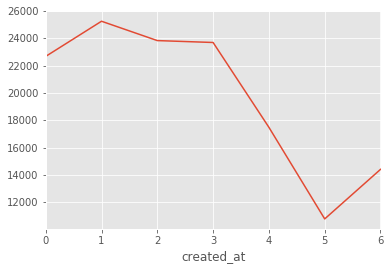

In [197]:
pothole = df[df['Descriptor'] == 'Pothole']
pothole.groupby(pothole.index.weekday)['Created Date'].count().plot(y='Created Date')

### What days of the week do people complain about loud parties?

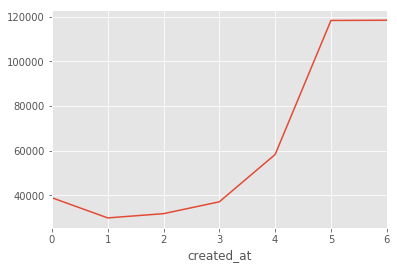

In [198]:
pothole = df[df['Descriptor'] == 'Loud Music/Party']
pothole.groupby(pothole.index.weekday)['Created Date'].count().plot(y='Created Date')

### What do you think is the best kind of graph for describing day of the week complaints?

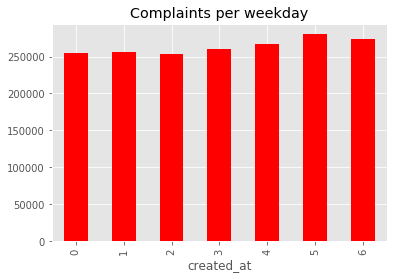

In [204]:
ax = df.groupby(df.index.weekday)['Created Date'].count().plot(kind='bar', y='Created Date', color='red')
ax.set_title('Complaints per weekday')

# Some more investigation

## Are there more homeless people in the city in the summer or in the winter?

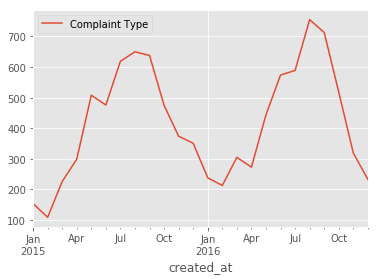

In [214]:
df[df['Complaint Type'] == 'Homeless Encampment'].sort_index().resample('M').count().plot(y='Complaint Type')

## What holiday(s) are most popular for illegal fireworks?

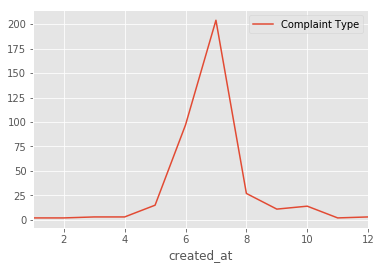

In [219]:
df[df['Complaint Type'] == 'Illegal Fireworks'].groupby(by=df[df['Complaint Type'] == 'Illegal Fireworks'].index.month).count().plot(y = 'Complaint Type')

## Plot all kinds of noise complaints on top of each other

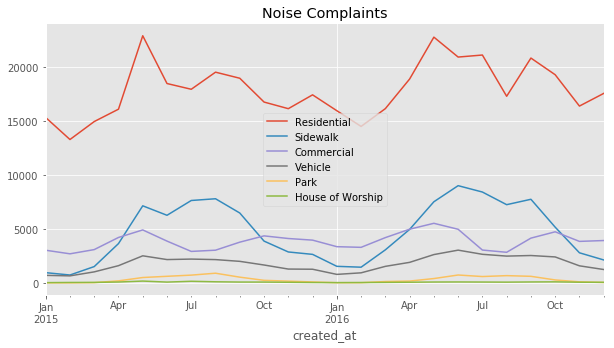

In [216]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize = (10, 5))

df[df['Complaint Type'] == "Noise - Residential"].sort_index().resample("M").count().plot(y="Complaint Type", label = "Residential", ax=ax)
df[df['Complaint Type'] == "Noise - Street/Sidewalk"].sort_index().resample("M").count().plot(y="Complaint Type", label = "Sidewalk", ax=ax)
df[df['Complaint Type'] == "Noise - Commercial"].sort_index().resample("M").count().plot(y="Complaint Type", label = "Commercial", ax=ax)
df[df['Complaint Type'] == "Noise - Vehicle"].sort_index().resample("M").count().plot(y="Complaint Type", label = "Vehicle", ax=ax)
df[df['Complaint Type'] == "Noise - Park"].sort_index().resample("M").count().plot(y="Complaint Type", label = "Park", ax=ax)
df[df['Complaint Type'] == "Noise - House of Worship"].sort_index().resample("M").count().plot(y="Complaint Type", label = "House of Worship", ax=ax)

ax.set_title("Noise Complaints")